In [1]:
import tensorflow as tf
print(tf.__version__)
import matplotlib.pyplot as plt

2.8.0


In [2]:
mapping = {0: "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress",
           4: "Coat", 5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag",
           9: "Ankle boot"}  # датасет содержит 10 классов

def show_mnist(images, labels, predicted_labels=None):

    for i in range(16):

        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.gray)
        if predicted_labels is not None:
            title_obj = plt.title(f"Real: {mapping[labels[i]]}. Pred: {mapping[predicted_labels[i]]}")
            if labels[i] != predicted_labels[i]:
                plt.setp(title_obj, color='r')
                plt.show()
        else:
            plt.title(f"Real label: {mapping[labels[i]]}")

4431872/4422102 [==============================] - 4s 1us/step
(60000, 28, 28) (10000, 28, 28)


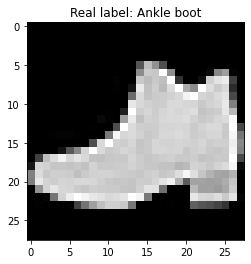

In [3]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

show_mnist(x_train, y_train)
print(x_train.shape, x_test.shape)

In [4]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(input_shape = (28, 28)),
                                    tf.keras.layers.Dense(512, activation = 'relu'),
                                    tf.keras.layers.Dense(10, activation = 'softmax')
])

model.summary()
model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(x = x_train, y = y_train,
          batch_size = 128, epochs = 15,
          validation_data = (x_test, y_test))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
469/469 [==============================] - 2s 4ms/step - loss: 0.5088 - accuracy: 0.8215 - val_loss: 0.4288 - val_accuracy: 0.8476
Epoch 2/15
469/469 [==============================] - 2s 4ms/step - loss: 0.3780 - accuracy: 0.8645 - val_loss: 0.3811 - val_accuracy: 0.8637
Epoch 3/15
469/469 [==========

In [5]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [6]:
x_train = x_train[..., None]
x_test = x_test[..., None]
print(x_train.shape, x_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [7]:
# Adding few Conv2D layers
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', 
                                 activation='relu', input_shape=(28, 28, 1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', 
                                 activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_2 (Dense)             (None, 64)               

In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
model.fit(x=x_train, y=y_train, 
          batch_size=128, epochs=20, 
          validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 24s 50ms/step - loss: 0.5062 - accuracy: 0.8176 - val_loss: 0.3884 - val_accuracy: 0.8561
Epoch 2/20
469/469 [==============================] - 24s 52ms/step - loss: 0.3263 - accuracy: 0.8824 - val_loss: 0.3552 - val_accuracy: 0.8681
Epoch 3/20
469/469 [==============================] - 24s 52ms/step - loss: 0.2791 - accuracy: 0.8996 - val_loss: 0.3195 - val_accuracy: 0.8846
Epoch 4/20
469/469 [==============================] - 25s 52ms/step - loss: 0.2527 - accuracy: 0.9080 - val_loss: 0.2662 - val_accuracy: 0.9062
Epoch 5/20
469/469 [==============================] - 25s 53ms/step - loss: 0.2316 - accuracy: 0.9160 - val_loss: 0.2574 - val_accuracy: 0.9069
Epoch 6/20
469/469 [==============================] - 25s 52ms/step - loss: 0.2138 - accuracy: 0.9219 - val_loss: 0.2604 - val_accuracy: 0.9054
Epoch 7/20
469/469 [==============================] - 24s 52ms/step - loss: 0.1969 - accuracy: 0.9277 - val_loss: 0.2551 - val_accuracy: